In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from math import floor
import os

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
#mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
import os
os.environ['PINT_ARRAY_PROTOCOL_FALLBACK'] = "0"
import pint
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Q_([])

In [4]:
def chi2_red(y,y_err,x,func,popt):
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    y_ajuste = func(x,*popt)
    
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

dcmls = lambda x : -int(floor(np.log10(abs(x))))

lineal0 = lambda x,a : a*x
lineal = lambda x,a,b : a*x+b

ureg = pint.UnitRegistry()

In [5]:
9920*2.2*1e-6

0.021824

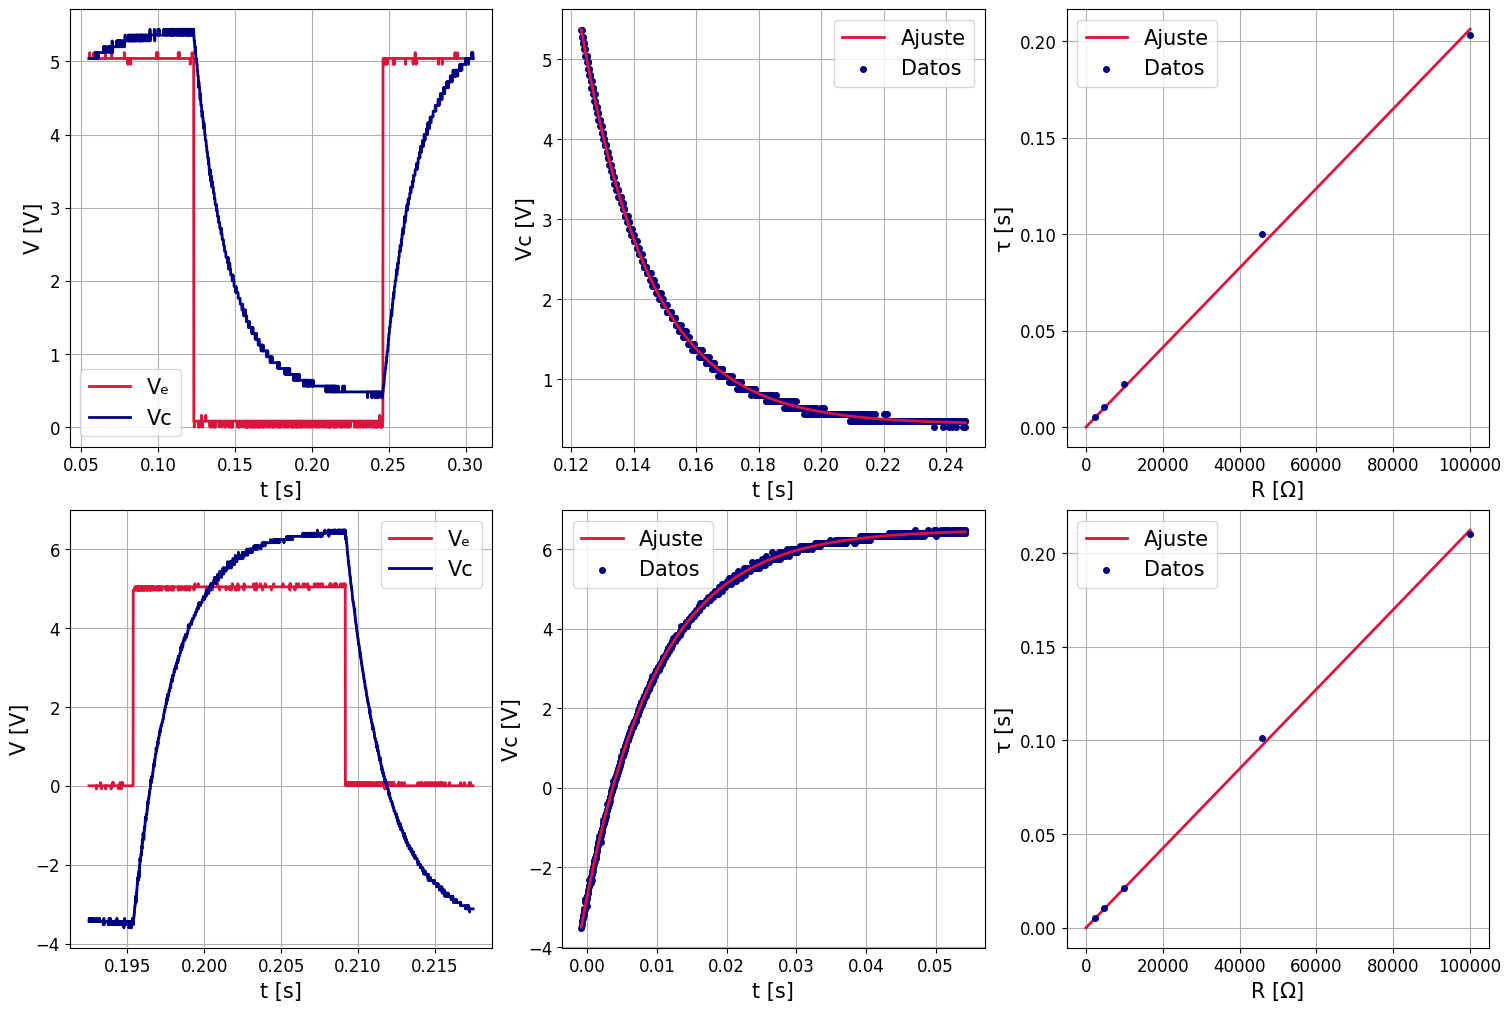

In [86]:
fig,axs = plt.subplots(2,3,figsize=(15,10),layout='constrained')

n = 2

axs[0,0].plot(np.array(td[n]),ved[n],'crimson',label='V\u2091',zorder=1)
axs[0,0].plot(np.array(td[n]),vcd[n],'navy',label='Vc',zorder=2)
axs[0,0].legend()
axs[0,0].grid()
axs[0,0].set_xlabel('t [s]')
axs[0,0].set_ylabel('V [V]')
axs[0,0].tick_params(axis='both',labelsize=12)


axs[0,1].plot(np.array(tiemposd[n]),yaj,'crimson',label='Ajuste',zorder=2)
axs[0,1].scatter(np.array(tiemposd[n]),vcapad[n],c='navy',label='Datos',zorder=1)
axs[0,1].legend()
axs[0,1].grid()
axs[0,1].set_xlabel('t [s]')
axs[0,1].set_ylabel('Vc [V]')
axs[0,1].tick_params(axis='both',labelsize=12)

axs[0,2].plot(puntos,ylin,'crimson',label='Ajuste',zorder=1)
axs[0,2].scatter(r,taus,c='navy',label='Datos',zorder=2)
axs[0,2].legend()
axs[0,2].grid()
axs[0,2].set_ylabel('\u03C4 [s]')
axs[0,2].set_xlabel('R [\u03A9]')
axs[0,2].tick_params(axis='both',labelsize=12)

n = 3

axs[1,0].plot(np.array(td[n]),vec[n],'crimson',label='V\u2091',zorder=1)
axs[1,0].plot(np.array(td[n]),vcc[n],'navy',label='Vc',zorder=2)
axs[1,0].legend()
axs[1,0].grid()
axs[1,0].set_xlabel('t [s]')
axs[1,0].set_ylabel('V [V]')
axs[1,0].tick_params(axis='both',labelsize=12)


axs[1,1].plot(np.array(tiempos_c[n]),yaj_c,'crimson',label='Ajuste',zorder=2)
axs[1,1].scatter(np.array(tiempos_c[n]),vcapa_c[n],c='navy',label='Datos',zorder=1)
axs[1,1].legend()
axs[1,1].grid()
axs[1,1].set_xlabel('t [s]')
axs[1,1].set_ylabel('Vc [V]')
axs[1,1].tick_params(axis='both',labelsize=12)

axs[1,2].plot(puntos_c,ylin_c,'crimson',label='Ajuste',zorder=1)
axs[1,2].scatter(r_c,taus_c,c='navy',label='Datos',zorder=2)
axs[1,2].legend()
axs[1,2].grid()
axs[1,2].set_ylabel('\u03C4 [s]')
axs[1,2].set_xlabel('R [\u03A9]')
axs[1,2].tick_params(axis='both',labelsize=12)
plt.savefig('plots/RC.png')

 El tiempo caracteristico tau para la resistencia  45800.0  es  0.10013680294060032
a y b son  10.459513901362396 0.9692481836581031
 El tiempo caracteristico tau para la resistencia  100000.0  es  0.20337531812285997
a y b son  6.63620662858023 0.1973975618187736
 El tiempo caracteristico tau para la resistencia  9920.0  es  0.02220741600750124
a y b son  1267.6354700956424 0.4341778361980748
 El tiempo caracteristico tau para la resistencia  2220.0  es  0.005100915929263541
a y b son  4.4213752352502086e+17 -1.8186008346563578
 El tiempo caracteristico tau para la resistencia  4630.0  es  0.010414428969872009
a y b son  0.023742825790621907 -3.0808186151321206


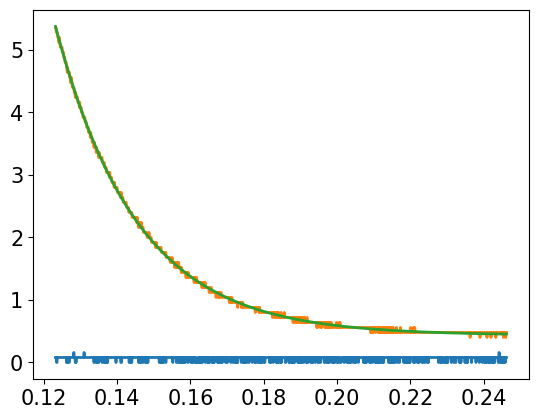

El valor de la capacitancia es de [2.06208385e-06]


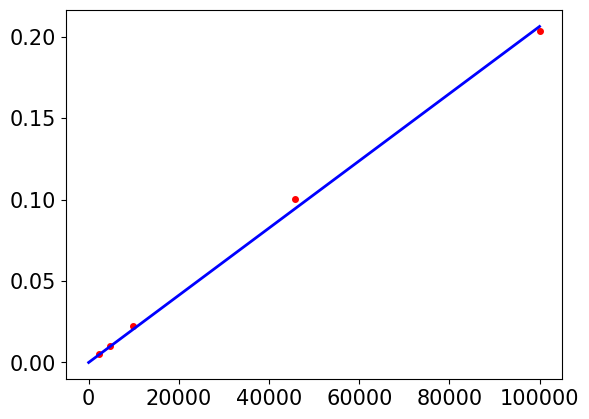

31.48796437082218


In [96]:
from scipy.optimize import curve_fit
def lineal(x, a):
    return a * x

def descarga(t, V0, tau, b):
    return V0* np.exp(-t/tau) + b
r=[]
#cosas descarga
ved=[]
vcd=[]
td=[]
tiemposd=[]
venvd=[]
vcapad=[]

files=os.listdir('RC')
filesc = []
filesd = []
for name in files:
    if name.endswith('d.csv'):
        filesd.append(name)
    if name.endswith('c.csv'):
        filesc.append(name)

#parte descarga   
for file in filesd:
    filee=file[:-6]
    fr=float(filee)
    r.append(fr)
    datos=np.loadtxt(f'RC/{file}', skiprows=1, delimiter=",")
    vcd.append(datos[:,1]) 
    td.append(datos[:,0])
    ved.append(datos[:,2])  
    
for i in range(len(r)):
    # filtrado de valores mas chicos que 2
    filtered_indices = np.where(np.sqrt((ved[i])**2) < 2)[0]
    tiempo = [td[i][idx] for idx in filtered_indices]
    enviado = [ved[i][idx] for idx in filtered_indices]
    voltajec= [vcd[i][idx] for idx in filtered_indices]
    #guardo los datos filtrados, (tiempos, voltaje enviado y voltaje en el capacitor) para solo la parte en la que carga
    tiemposd.append(tiempo)
    venvd.append(enviado)
    vcapad.append(voltajec)

taus=[]
optpar=[]
for i in range(len(r)):
    parametrosd, covd= curve_fit(descarga, tiemposd[i], vcapad[i], maxfev=1000000)
    a, tau, b = parametrosd
    optpar.append((a, tau, b))
    taus.append(tau)
    print(" El tiempo caracteristico tau para la resistencia ", r[i], " es ", tau)
    print("a y b son ", a, b)

n=2
a, tau, b=optpar[n]
#solo los de la parte que descarga
nms=np.linspace(min(tiemposd[n]), max(tiemposd[n]), len(tiemposd[n]))

plt.plot(tiemposd[n], venvd[n])
plt.plot(tiemposd[n], vcapad[n])
yaj=descarga(nms, a, tau, b)
plt.plot(nms, yaj)
plt.show()

#valor de la capacitancia
pend, covpend=curve_fit(lineal , r, taus)
print("El valor de la capacitancia es de", pend)
plt.scatter(r, taus, color="red")
puntos=np.linspace(0, 100000, 10000)
ylin=lineal(puntos, pend)
plt.plot(puntos, ylin, color="blue")
plt.show()

print(chi2_red(np.array(taus),np.array(taus)*(0.01+np.random.normal(loc=0.005,scale=0.005,size=len(taus))),np.array(r),lineal,pend))

In [84]:
2220*2.2*1e-6

0.0048839999999999995

[100000.0, 2220.0, 45800.0, 4630.0, 9920.0]
 El tiempo caracteristico tau para la resistencia  45800.0  es  0.2023613892853061
a y b son  9.077047426096033 -4.332118613150377
 El tiempo caracteristico tau para la resistencia  100000.0  es  0.005100915930660547
a y b son  1573.6805401579793 -1568.0871938751297
 El tiempo caracteristico tau para la resistencia  9920.0  es  0.0992817512590226
a y b son  15.26841224787267 -9.702147128919096
 El tiempo caracteristico tau para la resistencia  2220.0  es  0.010436388247753213
a y b son  9.181243601907717 -2.695355883285666
 El tiempo caracteristico tau para la resistencia  4630.0  es  0.022150880263489655
a y b son  4.951736409965354 0.46117568386600044
(9.181243601907717, -2.695355883285666, 0.010436388247753213)


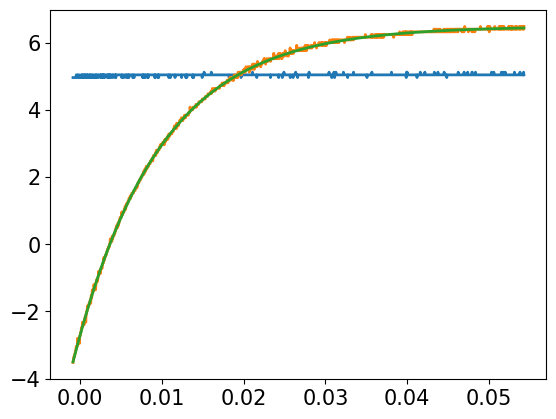

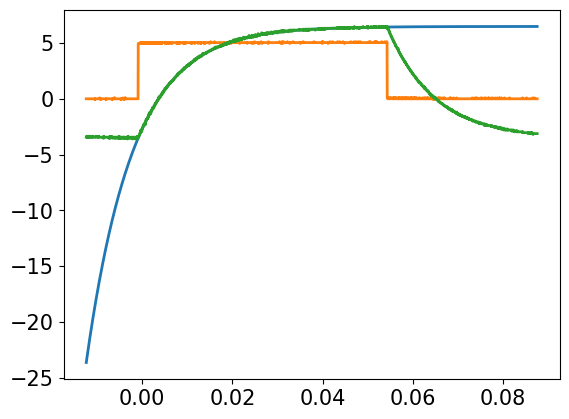

El valor de la capacitancia es de [2.12229128e-06]


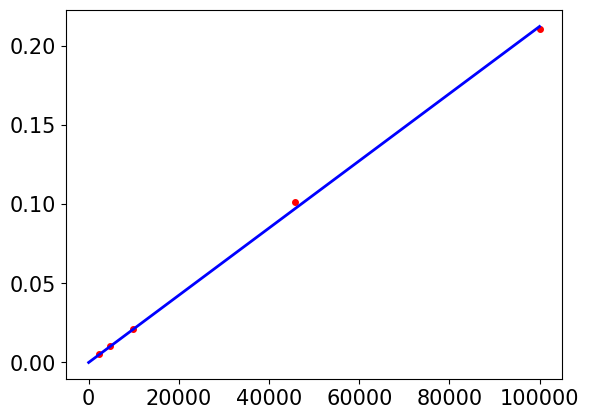

14.543965022046065


In [97]:
from scipy.optimize import curve_fit

def lineal(x, a):
    return a * x
def cargar(t, a, b, tau):
    return  a * (1 - np.exp(-t/tau)) + b

filesc = ['100000.0_c.csv', '2220.0_c.csv', '45800.0_c.csv','4630.0_c.csv','9920.0_c.csv']

r_c=[]
#cosas carga
vec=[]
vcc=[]
tc=[]
tiempos_c=[]
venv=[]
vcapa_c=[]


#parte carga
for file in filesc:
    filee=file[:-6]
    fr=float(filee)
    r_c.append(fr)
    datos=np.loadtxt(f'RC/{file}', skiprows=1, delimiter=",")
    vcc.append(datos[:,1]) 
    tc.append(datos[:,0])
    vec.append(datos[:,2]) 
    
for i in range(len(r)):
    # filtrado de valores mas chicos que 2
    filtered_indices = np.where(vec[i] > 2)[0]
    tiempo = [tc[i][idx] for idx in filtered_indices]
    enviado = [vec[i][idx] for idx in filtered_indices]
    voltajec= [vcc[i][idx] for idx in filtered_indices]
    #guardo los datos filtrados, (tiempos, voltaje enviado y voltaje en el capacitor) para solo la parte en la que carga
    tiempos_c.append(tiempo)
    venv.append(enviado)
    vcapa_c.append(voltajec)


print(r_c)
#queda ajustarlos por la exponencial de carga
taus_c=[ 0.2103753182293109, 0.005100915930660547, 0.10113680293907254, 0.01041442897082225, 0.02120741601309942 ]
aes=[9.077047412649412, 16, 15.268412450492324, 9.181243601987305, 4.951736405107642 ]
bs=[-4.332118596131855, -15, -9.702147339868148, -2.695355883486419,0.46117569112267587 ]

tiemposcarac=[]
optpar=[]
for i in range(len(r)):
    p0=(1.0, 8, taus_c[i])
    parametrosc, cov= curve_fit(cargar, tiempos_c[i], vcapa_c[i], p0=[aes[i], bs[i], taus_c[i]], maxfev=1000000)
    a, b, tau = parametrosc
    optpar.append((a, b, tau))
    print(" El tiempo caracteristico tau para la resistencia ", r[i], " es ", tau)
    print("a y b son ", a, b)
    tiemposcarac.append(tau)

n=3
print(optpar[n])
ai, bi, taui= optpar[n]

#solo los de la parte que carga
plt.plot(tiempos_c[n], venv[n])
plt.plot(tiempos_c[n], vcapa_c[n])
ev=np.linspace(min(tiempos_c[n]), max(tiempos_c[n]), len(tiempos_c[n]))
yaj_c=cargar(ev, ai, bi, taui)
plt.plot(tiempos_c[n], yaj_c)
plt.show()

#todos los datos
ajj=cargar(tc[n], ai, bi, taui)
plt.plot(tc[n], ajj)
plt.plot(tc[n], vec[n])
plt.plot(tc[n], vcc[n])
plt.show()

pend, covpend=curve_fit(lineal , r_c, taus_c)
print("El valor de la capacitancia es de", pend)
plt.scatter(r_c, taus_c, color="red")
puntos_c=np.linspace(0, 100000, 10000)
ylin_c=lineal(puntos_c, pend)
plt.plot(puntos_c, ylin_c, color="blue")
plt.show()

print(chi2_red(np.array(taus_c),np.array(taus_c)*(0.01+np.random.normal(loc=0.005,scale=0.005,size=len(taus_c))),np.array(r_c),lineal,pend))

In [67]:
print(filesc)

['1070.0.csv', '3018.0.csv', '5000.0.csv', '1262.0.csv', '2612.0.csv', '1982.0.csv', '3462.0.csv', '5500.0.csv', '1492.0.csv', '3980.0.csv']


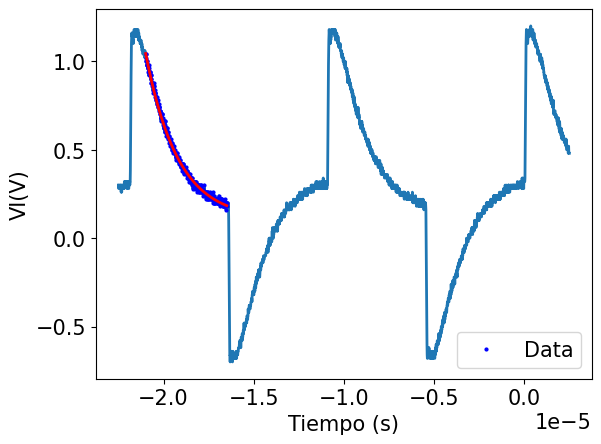

[1070.0, 1262.0, 1492.0, 1982.0, 2612.0, 3018.0, 3462.0, 3980.0, 5000.0, 5500.0]


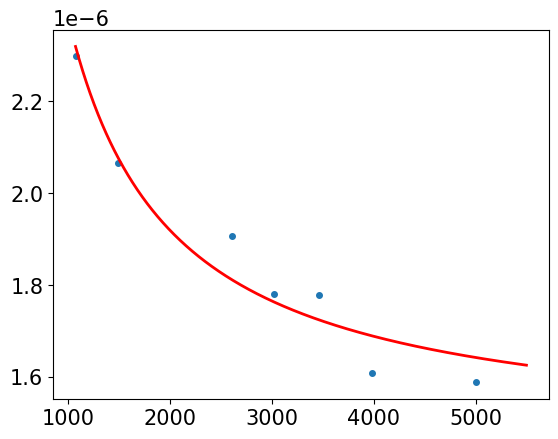

la inductancia es  0.0009224830204092005
6.302447327903644


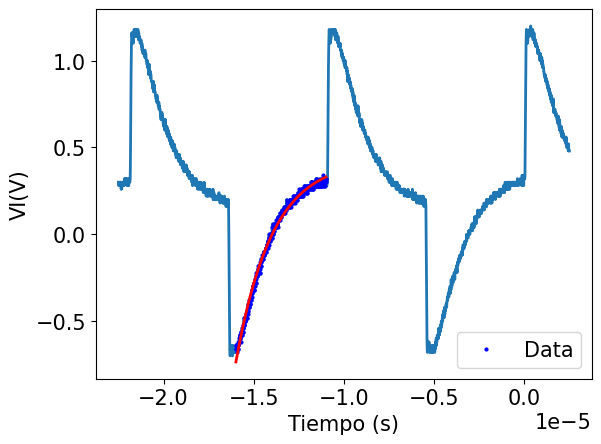

[1070.0, 1262.0, 1492.0, 1982.0, 2612.0, 3018.0, 3462.0, 3980.0, 5000.0, 5500.0]
[2.5301952727662376e-06, 1.9125628056390167e-06, 2.3292403411958677e-06, 1.9798902519552907e-06, 2.1538846450748166e-06, 2.004131374406898e-06, 2.0255328587074147e-06, 1.8226719084942705e-06, 1.7783214594936862e-06, 1.3613209851104552e-06]


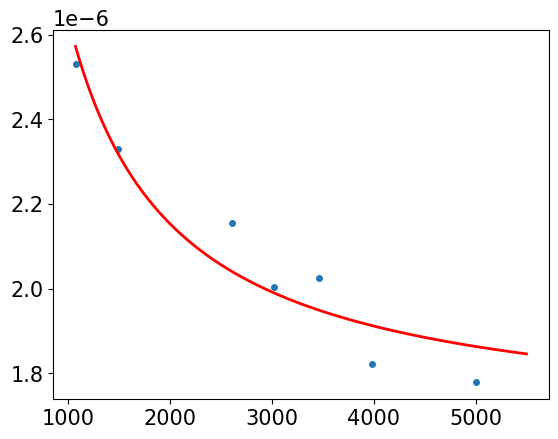

la inductancia es  0.000964587203712871
603.5316984283755


In [99]:
r=[]
ton=[]
toff=[]
veon=[]
vlon=[]
veoff=[]
vloff=[]
vl=[]
ve=[]
t=[]
taus=[]
tausoff=[]
n=5

filesc=['1070.0.csv','1262.0.csv','1492.0.csv','1982.0.csv','2612.0.csv','3018.0.csv','3462.0.csv','3980.0.csv','5000.0.csv','5500.0.csv']
for file in filesc:
    filee=file[:-4]
    fr=float(filee)
    r.append(fr)
    datos=np.loadtxt(f'RL/{file}', skiprows=1, delimiter=",")
    vl.append(datos[:,1]) 
    t.append(datos[:,0])
    ve.append(datos[:,2])

for i in range(len(r)):
    #para on
    time_range=[-0.0000210, -0.0000165]
    # filtrado de valores mas chicos que 2
    filtered_indices = np.where((ve[i] > 0.5) & (t[i] >= time_range[0]) & (t[i] <= time_range[1]))[0]
    tiempo = [t[i][idx] for idx in filtered_indices]
    enviado = [ve[i][idx] for idx in filtered_indices]
    enL= [vl[i][idx] for idx in filtered_indices]
    #guardo los datos filtrados, (tiempos, voltaje enviado y voltaje en el capacitor) para solo la parte en la que carga
    ton.append(tiempo)
    veon.append(enviado)
    vlon.append(enL)
    
for i in range(len(r)):
    #para off
    time_range=[-0.000016, -0.000011]
    # filtrado de valores mas grandes que 2
    filtered_indices = np.where((ve[i] < -0.5) & (t[i] >= time_range[0]) & (t[i] <= time_range[1]))[0]
    tiempo = [t[i][idx] for idx in filtered_indices]
    enviado = [ve[i][idx] for idx in filtered_indices]
    enL= [vl[i][idx] for idx in filtered_indices]
    #guardo los datos filtrados, (tiempos, voltaje enviado y voltaje en el capacitor) para solo la parte en la que carga
    toff.append(tiempo)
    veoff.append(enviado)
    vloff.append(enL)

#ahora ajustar con exponenciales la parte de off
def rl(t, V0, tau, b):
    return V0 * np.exp(-t * tau) + b
parsc=[]
tausc=[]
for i in range(len(r)):
    initial_guess = [1.0, 1.0, 1.0]  # Initial guesses for V0 and tau
    params, covariance = curve_fit(rl, ton[i], vlon[i], p0=initial_guess)
    fitted_V0, fitted_tau, bf = params
    parsc.append((fitted_V0, fitted_tau, bf))
    tausc.append(fitted_tau)

plt.plot(t[n], vl[n])
t_fit = np.linspace(min(ton[n]), max(ton[n]), 1000)
vlon_fit = rl(t_fit, parsc[n][0], parsc[n][1], parsc[n][2])
plt.plot(ton[n], vlon[n], 'b.', label='Data')
plt.plot(t_fit, vlon_fit, 'r')
plt.xlabel('Tiempo (s)')
plt.ylabel('VI(V)')
plt.legend()
plt.show()

#ahora quiero los taus en funcion de las resitencias para on
print(r)
filtrar=[1, 3, 9]
taupostac=[1 / tau for tau in tausc]
rfiltradoc=np.delete(r, filtrar)
taufiltradoc=np.delete(taupostac, filtrar)
def rel(r, L, b):
    return L/r + b
pars,covs= curve_fit(rel, rfiltradoc, taufiltradoc, p0=[10**(-3), 1.0])
L, b= pars
plt.scatter(rfiltradoc, taufiltradoc)
evc=np.linspace(1070, 5500, 1000)
ajc=rel(evc, L, b)
plt.plot(evc, ajc, c="r")
plt.show()
print("la inductancia es ", L)

print(chi2_red(np.array(taufiltradoc),np.array(taufiltradoc)*(0.01+np.random.normal(loc=0.005,scale=0.005,size=len(taufiltradoc))),np.array(rfiltradoc),rel,pars))

#ajusto con exponenciales las partes de off
def rl(t, V0, tau, b):
    return V0 * np.exp(-t * tau) + b
pars=[]
taus=[]
for i in range(len(r)):
    initial_guess = [-1.0, 1.0, 1.0]  
    params, covariance = curve_fit(rl, toff[i], vloff[i], p0=initial_guess)
    fitted_V0, fitted_tau, bf = params
    pars.append((fitted_V0, fitted_tau, bf))
    taus.append(fitted_tau)

plt.plot(t[n], vl[n])
t_fit_off = np.linspace(min(toff[n]), max(toff[n]), 1000)
vloff_fit = rl(t_fit_off, pars[n][0], pars[n][1], pars[n][2])
plt.plot(toff[n], vloff[n], 'b.', label='Data')
plt.plot(t_fit_off, vloff_fit, 'r')
plt.xlabel('Tiempo (s)')
plt.ylabel('VI(V)')
plt.legend()
plt.show()

#ahora quiero los taus en funcion de las resitencias para off
print(r)
filtrar=[1, 3, 9]
tauposta=[1 / tau for tau in taus]
rfiltrado=np.delete(r, filtrar)
taufiltrado=np.delete(tauposta, filtrar)
print(tauposta)
def rel(r, L, b):
    return L/r + b
pars,covs= curve_fit(rel, rfiltrado, taufiltrado, p0=[10**(-3), 1.0])
L, b= pars
plt.scatter(rfiltrado, taufiltrado)
ev=np.linspace(1070, 5500, 1000)
ajj=rel(ev, L, b)
plt.plot(ev, ajj, c="r")
plt.show()
print("la inductancia es ", L)
print(chi2_red(np.array(taufiltradoc),np.array(taufiltradoc)*(0.01+np.random.normal(loc=0.005,scale=0.005,size=len(taufiltradoc))),np.array(rfiltradoc),rel,pars))


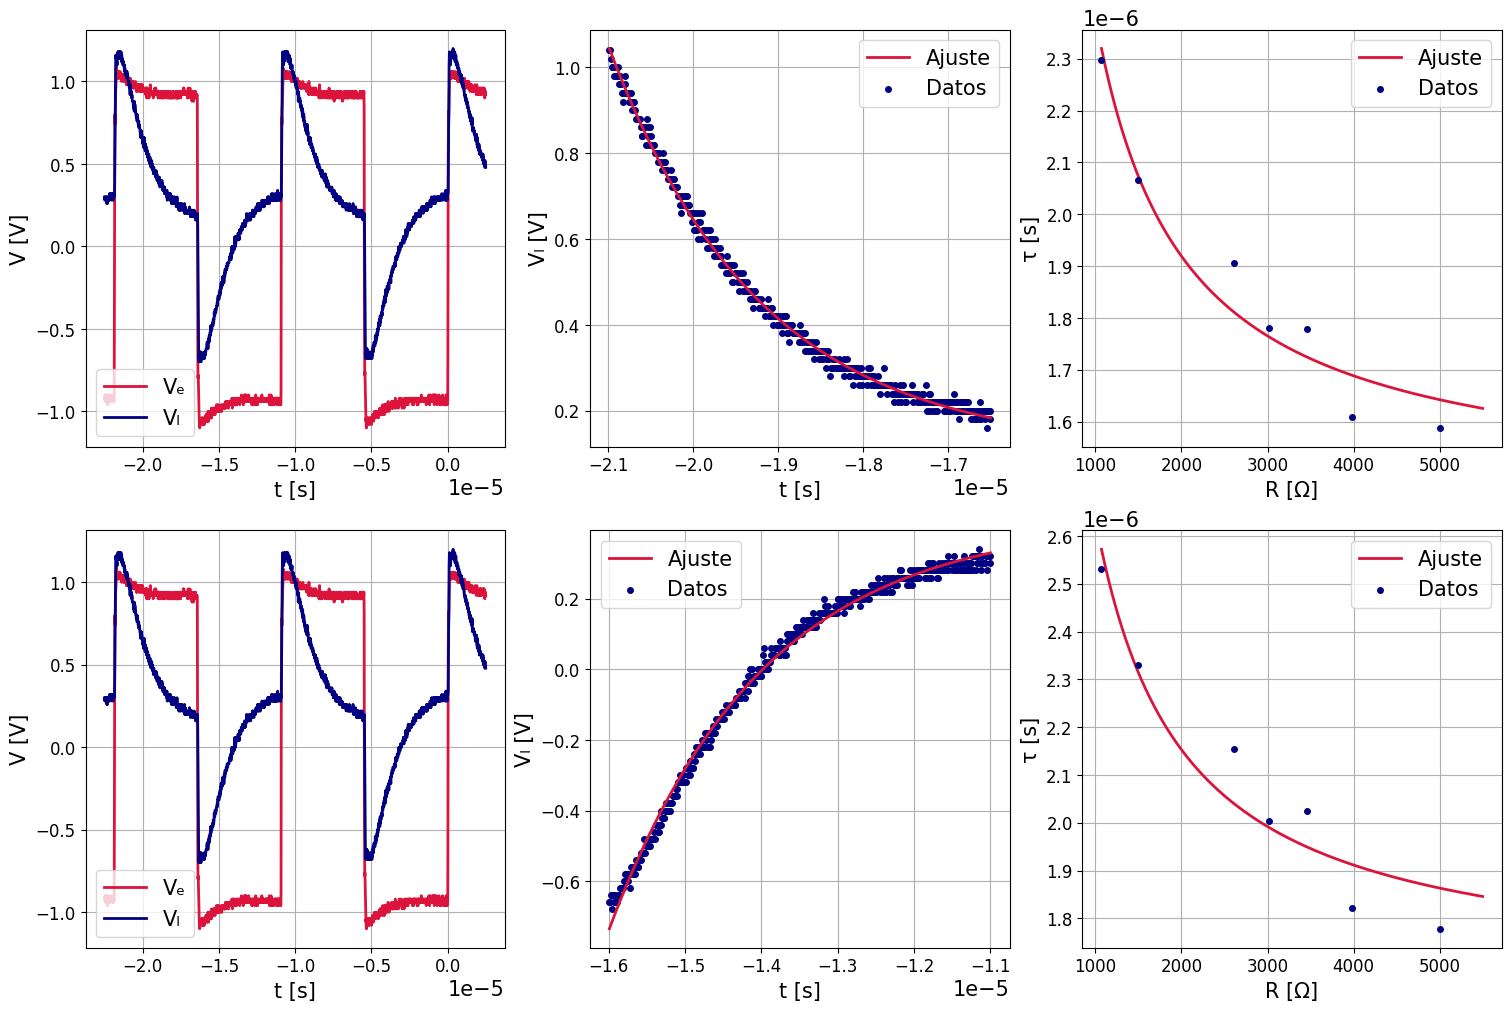

In [92]:
fig,axs = plt.subplots(2,3,figsize=(15,10),layout='constrained')

n = 5

axs[0,0].plot(t[n],ve[n],'crimson',label='V\u2091',zorder=1)
axs[0,0].plot(t[n],vl[n],'navy',label='V\u2097',zorder=2)
axs[0,0].legend()
axs[0,0].grid()
axs[0,0].set_xlabel('t [s]')
axs[0,0].set_ylabel('V [V]')
axs[0,0].tick_params(axis='both',labelsize=12)

axs[0,1].plot(t_fit,vlon_fit,'crimson',label='Ajuste',zorder=2)
axs[0,1].scatter(ton[n],vlon[n],c='navy',label='Datos',zorder=1)
axs[0,1].legend()
axs[0,1].grid()
axs[0,1].set_xlabel('t [s]')
axs[0,1].set_ylabel('V\u2097 [V]')
axs[0,1].tick_params(axis='both',labelsize=12)

axs[0,2].plot(evc,ajc,'crimson',label='Ajuste',zorder=1)
axs[0,2].scatter(rfiltradoc,taufiltradoc,c='navy',label='Datos',zorder=2)
axs[0,2].legend()
axs[0,2].grid()
axs[0,2].set_ylabel('\u03C4 [s]')
axs[0,2].set_xlabel('R [\u03A9]')
axs[0,2].tick_params(axis='both',labelsize=12)

axs[1,0].plot(t[n],ve[n],'crimson',label='V\u2091',zorder=1)
axs[1,0].plot(t[n],vl[n],'navy',label='V\u2097',zorder=2)
axs[1,0].legend()
axs[1,0].grid()
axs[1,0].set_xlabel('t [s]')
axs[1,0].set_ylabel('V [V]')
axs[1,0].tick_params(axis='both',labelsize=12)

axs[1,1].plot(t_fit_off,vloff_fit,'crimson',label='Ajuste',zorder=2)
axs[1,1].scatter(toff[n],vloff[n],c='navy',label='Datos',zorder=1)
axs[1,1].legend()
axs[1,1].grid()
axs[1,1].set_xlabel('t [s]')
axs[1,1].set_ylabel('V\u2097 [V]')
axs[1,1].tick_params(axis='both',labelsize=12)

axs[1,2].plot(ev,ajj,'crimson',label='Ajuste',zorder=1)
axs[1,2].scatter(rfiltrado,taufiltrado,c='navy',label='Datos',zorder=2)
axs[1,2].legend()
axs[1,2].grid()
axs[1,2].set_ylabel('\u03C4 [s]')
axs[1,2].set_xlabel('R [\u03A9]')
axs[1,2].tick_params(axis='both',labelsize=12)
plt.savefig('plots/RL.png')

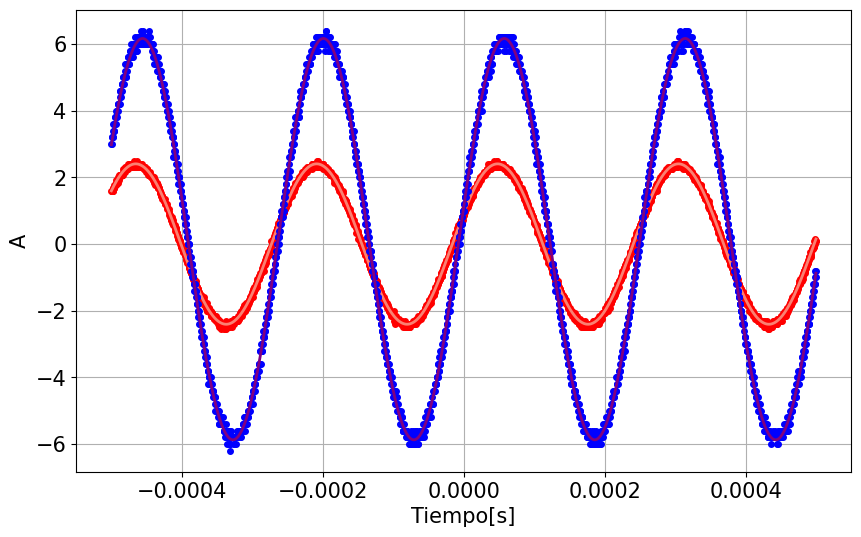

[-1.80691760e+00 -1.51802388e+01 -2.11974319e+00  1.99064596e+02
 -1.72080711e+06]


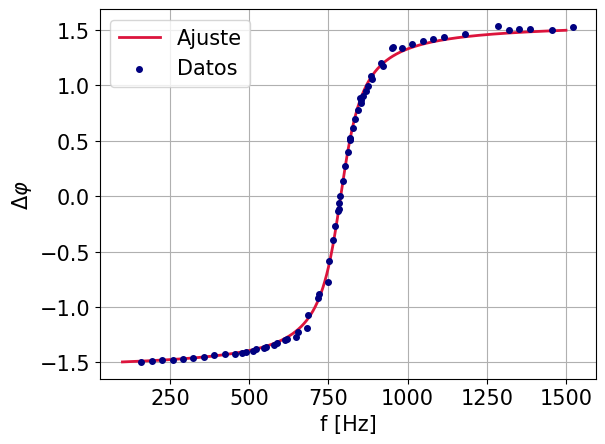

163.64743322469974
todo mal
[ 1.74554083e+05 -9.15100035e+00  2.29415887e-03  2.80549847e-07
 -8.48249242e+00]
todo bien?


/tmp/ipykernel_61094/2503886358.py:103: RuntimeWarning: divide by zero encountered in divide
  return V0 / (np.sqrt(R**2 + ((w * L - 1 / (w * C)))**2)) + b


Text(0, 0.5, 'Corriente [A]')

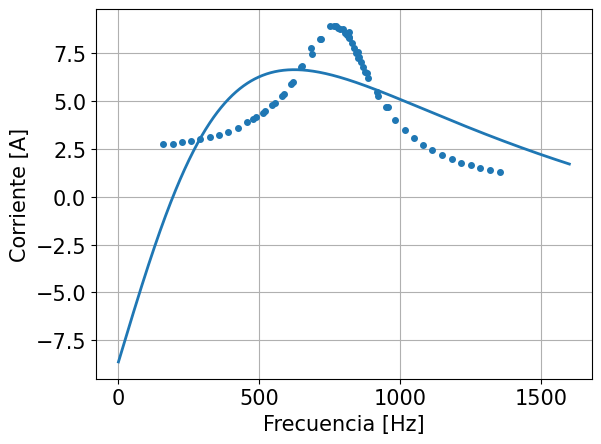

In [123]:
def seno(t, A, phi, w, b):
    return A * np.sin(2 * np.pi * w * t + phi) + b
       
#R=422
#L=
# diferencia de fase entre v e i
df = []
venv = []
vres =[]
ts=[]
ve=[]
vr=[]
ws=[]
wf=[]
we=[]
wr=[]

files_rlc = ['1000.0.csv', '10000.0.csv', '1207.0.csv', '1414.0.csv', '1621.0.csv', '1828.0.csv', '2034.0.csv', '2241.0.csv', '2448.0.csv', '2655.0.csv', '2862.0.csv', '3000.0.csv', '3069.0.csv', '3214.0.csv', '3276.0.csv', '3429.0.csv', '3483.0.csv', '3643.0.csv', '3690.0.csv', '3857.0.csv', '3897.0.csv', '4071.0.csv', '4103.0.csv', '4286.0.csv', '4310.0.csv', '4500.0.csv', '4517.0.csv', '4714.0.csv', '4724.0.csv', '4800.0.csv', '4850.0.csv', '4900.0.csv', '4929.0.csv', '4931.0.csv', '4950.0.csv', '5000.0.csv', '5050.0.csv', '5100.0.csv', '5138.0.csv', '5143.0.csv', '5150.0.csv', '5200.0.csv', '5250.0.csv', '5300.0.csv', '5345.0.csv', '5350.0.csv', '5357.0.csv', '5400.0.csv', '5450.0.csv', '5500.0.csv', '5552.0.csv', '5571.0.csv', '5759.0.csv', '5786.0.csv', '5966.0.csv', '6000.0.csv', '6172.0.csv', '6379.0.csv', '6586.0.csv', '6793.0.csv', '7000.0.csv', '7214.0.csv', '7429.0.csv', '7643.0.csv', '7857.0.csv', '8071.0.csv', '8286.0.csv', '8500.0.csv', '8714.0.csv', '8929.0.csv', '9143.0.csv', '9357.0.csv', '9571.0.csv', '9786.0.csv']

for file in files_rlc:
    freq_part=file[:-6]

    freq_part=(float(file[:-6]))

    ws.append(freq_part)
    m = np.loadtxt(f'../02 - Filtros/pasabanda/med resonancia/{file}', skiprows=1, delimiter=',')
    ts.append(m[:, 0])
    ve.append(m[:, 2])
    vr.append(m[:, 1])
    
  

    
    
  # Initialize empty lists to store parameters
params_list = []

# Loop through the datasets and fit the sine curves
for i in range(len(ws)):
    # Fit the sine curve to the data
    params, covariance = curve_fit(seno, ts[i], ve[i], p0=[1, 0, ws[i], 1.0], bounds=([0, -np.pi, 0, 0], [np.inf, np.pi, np.inf, np.inf])) 
    params2, covariance2 = curve_fit(seno, ts[i], vr[i], p0=[1, 0, ws[i], 1.0], bounds=([0, -np.pi, 0, 0], [np.inf, np.pi, np.inf, np.inf]))

    # Extract the fitted parameters
    amplitude, phase, angular_frequency, b = params
    AV, phaseV, angular_frequencyV, bv = params2

    # Calculate phase difference and save it
    fase = phase - phaseV
    if fase>0:
             df.append(fase-np.pi/2+0.05)
             wf.append(ws[i]/(2*np.pi))
             
     # Calculate amplitude ratio and save it
    if 1.2<amplitude:
        venv.append(amplitude)
        we.append(ws[i]/(2*np.pi))
    if 1.2<AV<9:
        vres.append(AV)
        wr.append(ws[i]/(2*np.pi))

    # Store the parameters in a list
    params_list.append((amplitude, phase, angular_frequency, b,  AV, phaseV, angular_frequencyV, bv))

plt.figure(figsize=(10, 6))
i = 20
plt.plot(ts[i], ve[i], 'ro', label='Datos voltaje resistencia')
fitted_curve = seno(ts[i], *params_list[i][:4])
plt.plot(ts[i], fitted_curve, 'salmon', label='ajuste de V_r')
plt.plot(ts[i], vr[i], 'bo', label='Datos voltaje medido')
fitted_curveV = seno(ts[i], *params_list[i][4:])
plt.plot(ts[i], fitted_curveV, 'purple', label='ajuste a V_e')
plt.xlabel('Tiempo[s]')
plt.ylabel('A')
plt.grid(True)
plt.show()  



def rara(w, A, B, L, R, C):
    return np.arctan(A*((w*L-(1/(w*C)))/R) + B)

parara,covrara= curve_fit(rara, wf, df, maxfev=(1000000))
print(parara)
ev=np.linspace(100, 1500, 1200)
y=rara(ev, parara[0],parara[1],parara[2], parara[3], parara[4])
plt.plot(ev,y,'crimson',zorder=1,label='Ajuste')
plt.scatter(wf, df,c="navy",zorder=2,label='Datos')
plt.grid()
plt.xlabel("f [Hz]")
plt.ylabel(r'$\Delta \varphi $')
plt.legend()
plt.savefig('plots/rara.png')
plt.show()
print(chi2_red(np.array(df),np.array(df)*(0.05+np.random.normal(loc=0.025,scale=0.025,size=len(df))),np.array(wf),rara,parara))
print("todo mal")
 #ajuste corriente en función de la frecuencia
#ires= vres/R, el ajuste hay que hacerlo a la corriente, pero no se el valor de la resistencia
p0=[9, 0.01, 1111, 10**(-7), 2]


def campana(w, V0, L, R, C, b):
    return V0 / (np.sqrt(R**2 + ((w * L - 1 / (w * C)))**2)) + b


parcam, covcam= curve_fit(campana,  wr, vres, p0=p0, maxfev=1000000)
print(parcam)
print("todo bien?")
ev=np.linspace(0, 1600, 1200)
yaj=campana(ev, *parcam)-0.15
plt.plot(ev, yaj)
plt.scatter(wr, vres)
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Corriente [A]")
